<a href="https://colab.research.google.com/github/putraaryawinata/Sleep-Quality/blob/master/Correlation_of_Sleeping_Quality_on_Short_Term_Memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import csv
from sklearn.preprocessing import StandardScaler

In [ ]:
#Backspan a number
def backspan(number):
  num = number
  reversed_num = 0
  while num != 0:
    digit = num % 10
    reversed_num = reversed_num * 10 + digit
    num //= 10
  return reversed_num

#Build the key answer for backspan test
def kj(list):
  list_kj = []
  for i in range(len(list)):
    list_kj.append(backspan(list[i]))
  return list_kj

In [ ]:
kj_d1 = kj([579, 618, 3482, 1697, 92168, 53741, 732985, 416532, 8265941, 9237465, 19528643, 37219548, 587319246, 249385617])
kj_d2 = kj([258, 179, 7314, 4852, 65943, 86217, 516794, 394861, 9638152, 7841592, 47298516, 12537986, 319528476, 541627983])
kj_d3 = kj([348, 126, 5293, 7368, 49852, 24961, 954761, 813624, 6297438, 7486135, 51783642, 35248617, 412536978, 184563279])
kj_d4 = kj([672, 398, 4867, 8945, 98142, 57426, 749582, 279685, 1925836, 4329567, 65142739, 21569348, 972435168, 745298163])
kj = np.array([kj_d1, kj_d2, kj_d3, kj_d4])
kj.shape

(4, 14)

In [ ]:
#Input process of the backspan test
with open('backspan_test.csv') as csvfile:
  reader = csv.reader(csvfile)
  next(reader)
  nim = []
  answer = []
  for row in reader:
    nim.append(row[1])
    num_array = np.array(row[2:])
    answer.append(num_array)
#answer array
answer = np.array(answer)
answer = answer.astype(int)
#nim array
nim = np.array(nim)

In [ ]:
#Giving a pre-score for participants' answer
def check_ans(ans, kj_ans):
  """
    ans and kj_ans are numpy array
  """
  array_ans = np.zeros(ans[:, 1:].shape)
  for i in range(answer.shape[0]):
    for j in range(14):
      array_ans[i, j] += int(ans[i, j+1] == kj_ans[ans[i, 0] - 1][j])
      
  return array_ans

In [ ]:
score = check_ans(answer, kj)
print(len(score))

119


In [ ]:
new_nim = nim.reshape(1,len(score))
backspan_result = np.concatenate((new_nim.T, score), axis=1)
print(backspan_result)

[['1902511093' '1.0' '1.0' ... '0.0' '0.0' '1.0']
 ['1902511038' '1.0' '0.0' ... '0.0' '0.0' '0.0']
 ['1902511030' '0.0' '0.0' ... '0.0' '0.0' '0.0']
 ...
 ['1902511073' '0.0' '0.0' ... '0.0' '0.0' '0.0']
 ['1902511080' '1.0' '1.0' ... '0.0' '0.0' '0.0']
 ['1902511128' '1.0' '1.0' ... '0.0' '0.0' '0.0']]


In [ ]:
np.savetxt("trial.csv", backspan_result, fmt="%s", delimiter=',')

In [ ]:
def backspan_scores(list_score):
  res_score = 0
  for i in range(7):
    if(list_score[2*i] + list_score[2*i+1] == 0):
      return res_score
    res_score += 1
  return res_score

In [ ]:
backspan_scores([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

5

In [ ]:
score_mahasiswa = np.zeros(len(score),)
for i, mahasiswa in enumerate(backspan_result):
  score_mahasiswa[i] += backspan_scores(mahasiswa[1:].astype(float))
  
#print(score_mahasiswa.reshape(1, 117))
#print(new_nim)
backspan_result_array = np.concatenate((new_nim.T, score_mahasiswa.reshape(1, len(score)).T), axis=1)
np.savetxt("backspan_result.csv", backspan_result_array, fmt="%s", delimiter=',')

In [ ]:
#Reading CSV file of the result for both psqi and backspan
with open('psqi_and_backspan_result.csv') as csvfile:
  reader = csv.reader(csvfile)
  x = []
  y = []
  next(reader) #skip read the header
  for row in reader:
    x.append(row[1])
    y.append(int(row[-1])+2)
  x = np.array(x).astype(int)
  y = np.array(y).astype(int)

# Data Analysis (PSQI v Backspan)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('psqi_and_backspan_result.csv')
x = dataset.iloc[:,1].values
y = dataset.iloc[:,2].values
xy = dataset.iloc[:, 1:].values

In [ ]:
from scipy import stats
print("Kolmogorov-Smirnov data psqi: {}".format(stats.kstest(x, stats.norm.cdf)))

Kolmogorov-Smirnov data psqi: KstestResult(statistic=0.9719834353017033, pvalue=7.19691173716131e-117)


In [ ]:
from scipy import stats
print("Kolmogorov-Smirnov data backspan: {}".format(stats.kstest(y, stats.norm.cdf)))

Kolmogorov-Smirnov data backspan: KstestResult(statistic=0.8839165347184874, pvalue=1.5414666190226763e-70)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_std = sc.fit_transform(x.reshape(len(x),1))
y_std = sc.fit_transform(y.reshape(len(y),1))

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x.reshape(len(x), 1), y)

LinearRegression()

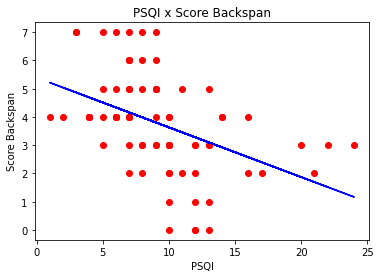

In [ ]:
plt.scatter(x.reshape(len(x), 1), y.reshape(len(y),1), color='red')
plt.plot(x.reshape(len(x),1), regressor.predict(x.reshape(len(x),1)), color = 'blue')
plt.title('PSQI x Score Backspan')
plt.xlabel('PSQI')
plt.ylabel('Score Backspan')
plt.show()

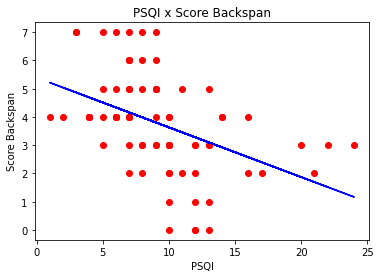

In [ ]:
plt.scatter(x.reshape(len(x), 1), y.reshape(len(y),1), color='red')
plt.plot(x.reshape(len(x),1), regressor.predict(x.reshape(len(x),1)), color = 'blue')
plt.title('PSQI x Score Backspan')
plt.xlabel('PSQI')
plt.ylabel('Score Backspan')
plt.show()

In [ ]:
res = y - regressor.predict(x.reshape(len(x), 1))

In [ ]:
res

array([-0.27927543,  1.12994438, -3.27927543, -1.63158038,  1.19226714,
       -1.21695266,  1.07302952, -2.16003781,  0.19226714,  1.07302952,
       -0.51234276, -0.57466553, -3.27927543, -1.45542791,  0.48765724,
       -0.27927543, -1.27927543, -0.39851305, -1.98388533, -0.10312295,
        0.30609685,  2.01611467, -2.63158038,  1.42533447,  2.19226714,
        2.66380971,  2.48765724, -0.16003781, -1.04080019, -1.51234276,
       -0.33619029, -0.68849524,  2.13535229, -2.10312295, -0.68849524,
       -0.16003781,  1.83996219, -0.33619029,  0.36841962, -0.68849524,
        1.19226714,  3.01611467, -0.33619029,  1.83455428,  1.83996219,
       -3.10312295, -0.68849524,  1.89687705, -0.80773286,  3.19226714,
       -0.80773286, -2.27927543,  2.13535229,  2.83996219, -0.33619029,
       -0.16003781, -1.63158038,  1.19226714,  0.83996219, -0.63158038,
        0.36841962,  1.83996219,  1.48224933,  1.01611467, -0.63158038,
       -1.16003781,  0.83996219, -0.63158038, -0.10312295, -3.63

In [ ]:
import scipy.stats

results = scipy.stats.linregress(x, y)
print('Slope: {}'.format(results[0]))
print('Intercept: {}'.format(results[1]))
print('R_value: {}'.format(results[2]))
print('P_value: {}'.format(results[3]))
print('Std_err: {}'.format(results[4]))

Slope: -0.17615247582345675
Intercept: 5.3931051406965755
R_value: -0.4427751068188782
P_value: 6.954601304349733e-05
Std_err: 0.04175021344206948


In [ ]:
kstest_psqi = scipy.stats.kstest(x, 'norm')
kstest_backspan = scipy.stats.kstest(y, 'norm')
kstest_res = scipy.stats.kstest(res, 'norm')
print('PSQI: {}'.format(kstest_psqi))
print('Backspan Test: {}'.format(kstest_backspan))
print('Residual: {}'.format(kstest_res))

PSQI: KstestResult(statistic=0.9719834353017033, pvalue=7.19691173716131e-117)
Backspan Test: KstestResult(statistic=0.8839165347184874, pvalue=1.5414666190226763e-70)
Residual: KstestResult(statistic=0.16521260702884166, pvalue=0.02945369212607824)


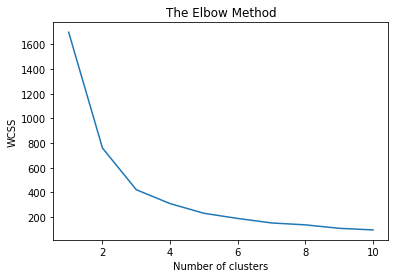

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(xy)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(xy)
  labels = kmeans.labels_
  sil.append(silhouette_score(xy, labels, metric = 'euclidean'))

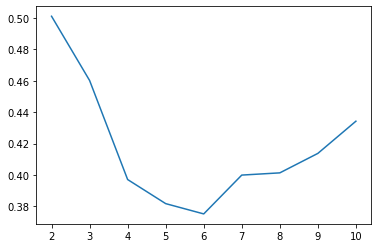

In [ ]:
plt.plot([2, 3, 4, 5, 6, 7, 8, 9, 10], sil)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(xy)

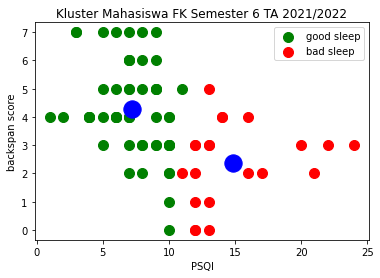

In [ ]:
plt.scatter(xy[y_kmeans == 1, 0], xy[y_kmeans == 1, 1], s = 100, c = 'green', label = 'good sleep')
plt.scatter(xy[y_kmeans == 0, 0], xy[y_kmeans == 0, 1], s = 100, c = 'red', label = 'bad sleep')
# plt.scatter(xy[y_kmeans == 2, 0], xy[y_kmeans == 2, 1], s = 100, c = 'red', label = 'bad sleep')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'blue') # , label = 'Centroids')
plt.title('Kluster Mahasiswa FK Semester 6 TA 2021/2022')
plt.xlabel('PSQI')
plt.ylabel('backspan score')
plt.legend()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(xy)

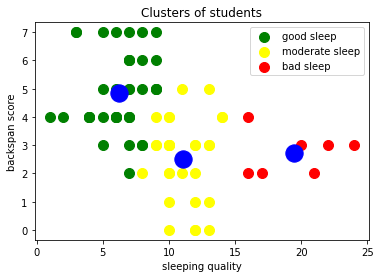

In [ ]:
plt.scatter(xy[y_kmeans == 1, 0], xy[y_kmeans == 1, 1], s = 100, c = 'green', label = 'good sleep')
plt.scatter(xy[y_kmeans == 0, 0], xy[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'moderate sleep')
plt.scatter(xy[y_kmeans == 2, 0], xy[y_kmeans == 2, 1], s = 100, c = 'red', label = 'bad sleep')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'blue') # , label = 'Centroids')
plt.title('Clusters of students')
plt.xlabel('sleeping quality')
plt.ylabel('backspan score')
plt.legend()
plt.show()

In [ ]:
r, p = scipy.stats.pearsonr(x, y)
print("value of r: {}\nvalue of p: {}".format(r,p))
print(np.corrcoef(x, y))
print(np.cov(x,y))

value of r: -0.4427751068188778
value of p: 6.954601304349867e-05
[[ 1.         -0.44277511]
 [-0.44277511  1.        ]]
[[19.82414414 -3.49207207]
 [-3.49207207  3.13765766]]
